## Mount Drive

In [1]:
# mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Datasets

In [2]:
import pandas as pd
import numpy as np

In [3]:
data_yelp = pd.read_csv('/content/gdrive/MyDrive/nlp project/datasets/yelp_labelled.txt', sep='\t',header=None)

In [4]:
data_yelp.head()
# review and sentiment
# 0-Negative, 1-Positive for positive review

,0,1
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
# Assign column names
columan_name = ['Review', 'Sentiment']
data_yelp.columns = columan_name

In [6]:
data_yelp.head()

,Review,Sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [7]:
data_yelp.shape
# 1000 rows (reviews), 2 columns (Sentiments)

(1000, 2)

In [8]:
data_amazon = pd.read_csv('/content/gdrive/MyDrive/nlp project/datasets/amazon_cells_labelled.txt',sep='\t',header=None)
data_amazon.head()
# review and sentiment
# 0-Negative, 1-Positive for positive review

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [9]:
data_amazon.columns = columan_name

In [10]:
data_amazon.head()

,Review,Sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [11]:
data_amazon.shape

(1000, 2)

In [12]:
data_imdb = pd.read_csv('/content/gdrive/MyDrive/nlp project/datasets/imdb_labelled.txt',sep='\t',header=None)
data_imdb.head()

,0,1
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [13]:
data_imdb.columns = columan_name
data_imdb.head()

,Review,Sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [14]:
# Append all the data in a single dataframe
data = data_yelp.append([data_amazon, data_imdb],ignore_index=True)

<ipython-input-14-126c26eba69a>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data_yelp.append([data_amazon, data_imdb],ignore_index=True)


In [15]:
data.shape

(2748, 2)

In [16]:
data.head()


,Review,Sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [17]:
# check distribution of sentiments
data['Sentiment'].value_counts()

# 1346 positive reviews
# 1362 Negative reviews

1    1386
0    1362
Name: Sentiment, dtype: int64

In [18]:
# check for null values
data.isnull().sum()

# no null values in the data

Review       0
Sentiment    0
dtype: int64

In [19]:
x = data['Review']
y = data['Sentiment']

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## Text Processing and generating vocabulary for the training data

In [23]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [24]:
from nltk.corpus import stopwords
import string
from collections import Counter

In [25]:
# turn a doc into clean tokens
def clean_doc(doc):
 # split into tokens by white space
 tokens = doc.split()
 # remove punctuation from each token
 table = str.maketrans('', '', string.punctuation)
 tokens = [w.translate(table) for w in tokens]
 # remove remaining tokens that are not alphabetic
 tokens = [word for word in tokens if word.isalpha()]
 # filter out stop words
 stop_words = set(stopwords.words('english'))
 tokens = [w for w in tokens if not w in stop_words]
 # filter out short tokens
 tokens = [word for word in tokens if len(word) > 1]
 return tokens

In [26]:
# load docs and add to vocab
def process_docs(vocab):
 # clean doc
 for doc in x_train:
  tokens = clean_doc(doc)
  # update counts
  vocab.update(tokens)


In [27]:
# define vocab
vocab = Counter()
process_docs(vocab)
# print the size of the vocab
print(len(vocab))
# print the top words in the vocab
print(vocab.most_common(50))

5117
[('The', 367), ('good', 164), ('This', 147), ('movie', 144), ('film', 128), ('great', 127), ('phone', 120), ('It', 119), ('one', 117), ('like', 105), ('food', 97), ('time', 88), ('place', 85), ('service', 77), ('really', 75), ('bad', 70), ('well', 69), ('would', 64), ('ever', 61), ('even', 56), ('best', 55), ('quality', 53), ('back', 52), ('dont', 52), ('Ive', 51), ('made', 50), ('work', 48), ('get', 45), ('Im', 45), ('Great', 45), ('Its', 44), ('go', 44), ('also', 43), ('use', 41), ('product', 41), ('love', 40), ('recommend', 40), ('better', 38), ('got', 37), ('If', 37), ('could', 37), ('much', 37), ('think', 36), ('didnt', 36), ('never', 34), ('acting', 34), ('see', 34), ('works', 33), ('way', 32), ('pretty', 32)]


In [28]:
# keep tokens with a min occurrence
min_occurance = 2
tokens = [k for k,c in vocab.items() if c >= min_occurance]
print(len(tokens))

1890


In [29]:
# save list to file
def save_list(lines, filename):
 # convert lines to a single blob of text
 data = '\n'.join(lines)
 # open file
 file = open(filename, 'w')
 # write text
 file.write(data)
 # close file
 file.close()

# save tokens to a vocabulary file
save_list(tokens, 'vocab.txt')

## Processing for Embedding Layer

In [30]:
# load doc into memory
def load_doc(filename):
 # open the file as read only
 file = open(filename, 'r')
 # read all text
 text = file.read()
 # close the file
 file.close()
 return text

# load the vocabulary
vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)

In [31]:
from string import punctuation
# turn a doc into clean tokens
def clean_doc(doc, vocab):
 # split into tokens by white space
 tokens = doc.split()
 # remove punctuation from each token
 table = str.maketrans('', '', punctuation)
 tokens = [w.translate(table) for w in tokens]
 # filter out tokens not in vocab
 tokens = [w for w in tokens if w in vocab]
 tokens = ' '.join(tokens)
 return tokens

In [32]:
# load all docs for the train set
def process_docs(vocab):
  documents = list()
  # clean doc
  for doc in x_train:
    tokens = clean_doc(doc, vocab)
    # add to list
    documents.append(tokens)
  return documents


# load all training reviews
train_docs = process_docs(vocab)

In [34]:
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# create the tokenizer
tokenizer = Tokenizer()
# fit the tokenizer on the documents
tokenizer.fit_on_texts(train_docs)

In [35]:
# sequence encode
encoded_docs = tokenizer.texts_to_sequences(train_docs)

In [36]:
# pad sequences
max_length = max([len(s.split()) for s in train_docs])
Xtrain = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

In [39]:
# Convert the list of labels to an array
ytrain = np.array(y_train.tolist())

print(ytrain)

[1 1 1 ... 1 1 1]


## Model

In [40]:
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Conv1D, MaxPooling1D

In [41]:
# define vocabulary size (largest integer value)
vocab_size = len(tokenizer.word_index) + 1

In [42]:
# define model
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_length))
model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 578, 100)          174300    
                                                                 
 conv1d (Conv1D)             (None, 571, 32)           25632     
                                                                 
 max_pooling1d (MaxPooling1  (None, 285, 32)           0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 9120)              0         
                                                                 
 dense (Dense)               (None, 10)                91210     
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                        

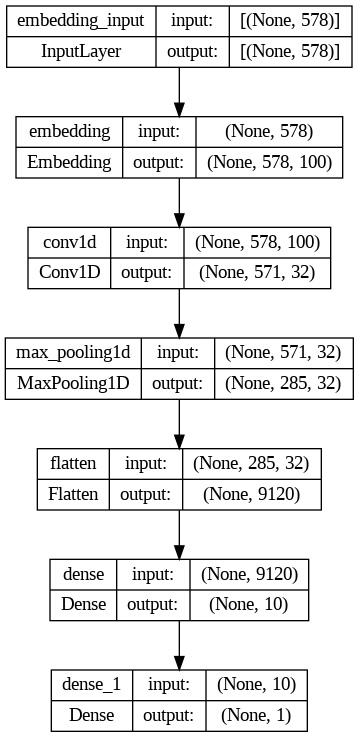

In [43]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)


In [44]:
# compile network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
model.fit(Xtrain, ytrain, epochs=10, verbose=2)

Epoch 1/10
69/69 - 9s - loss: 0.6940 - accuracy: 0.5146 - 9s/epoch - 131ms/step
Epoch 2/10
69/69 - 8s - loss: 0.6425 - accuracy: 0.7721 - 8s/epoch - 122ms/step
Epoch 3/10
69/69 - 6s - loss: 0.3305 - accuracy: 0.8667 - 6s/epoch - 89ms/step
Epoch 4/10
69/69 - 9s - loss: 0.1665 - accuracy: 0.9395 - 9s/epoch - 134ms/step
Epoch 5/10
69/69 - 6s - loss: 0.0985 - accuracy: 0.9659 - 6s/epoch - 87ms/step
Epoch 6/10
69/69 - 8s - loss: 0.0627 - accuracy: 0.9786 - 8s/epoch - 116ms/step
Epoch 7/10
69/69 - 7s - loss: 0.0428 - accuracy: 0.9832 - 7s/epoch - 106ms/step
Epoch 8/10
69/69 - 6s - loss: 0.0349 - accuracy: 0.9818 - 6s/epoch - 92ms/step
Epoch 9/10
69/69 - 9s - loss: 0.0280 - accuracy: 0.9895 - 9s/epoch - 131ms/step
Epoch 10/10
69/69 - 6s - loss: 0.0244 - accuracy: 0.9882 - 6s/epoch - 89ms/step


In [45]:
# save the model
model.save('model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Model Evaluation


In [46]:
# load all docs for the test set
def process_docs(vocab):
  documents = list()
  # clean doc
  for doc in x_test:
    tokens = clean_doc(doc, vocab)
    # add to list
    documents.append(tokens)
  return documents


# load all testing reviews
test_docs = process_docs(vocab)

In [48]:
# sequence encode
encoded_test_docs = tokenizer.texts_to_sequences(test_docs)

In [49]:
# pad sequences
Xtest = pad_sequences(encoded_test_docs, maxlen=max_length, padding='post')

In [50]:
# Convert the list of labels to an array
ytest = np.array(y_test.tolist())

print(ytest)

[0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1
 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1
 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 1
 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0 1 1
 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1
 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0
 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0
 0 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0
 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0
 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0
 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0
 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0
 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0
 1 1 1 0 0 0 0 0 1 1 1 0 

In [51]:
# evaluate model on training dataset
_, acc = model.evaluate(Xtrain, ytrain, verbose=0)
print('Train Accuracy: %.2f' % (acc*100))



Train Accuracy: 99.14


In [52]:
# evaluate model on test dataset
_, acc = model.evaluate(Xtest, ytest, verbose=0)
print('Test Accuracy: %.2f' % (acc*100))

Test Accuracy: 75.82


## Testing Positive and Negative Reveiws

In [53]:
# integer encode and pad documents
def encode_docs(tokenizer, max_length, docs):
  # integer encode
  encoded = tokenizer.texts_to_sequences(docs)
  # pad sequences
  padded = pad_sequences(encoded, maxlen=max_length, padding='post')
  return padded


In [54]:
def predict_sentiment(review, vocab, tokenizer, max_length, model):
  # clean review
  line = clean_doc(review, vocab)
  # encode and pad review
  padded = encode_docs(tokenizer, max_length, [line])
  # predict sentiment
  yhat = model.predict(padded, verbose=0)
  # retrieve predicted percentage and label
  percent_pos = yhat[0,0]
  if round(percent_pos) == 0:
    return (1-percent_pos), 'NEGATIVE'
  return percent_pos, 'POSITIVE'


In [56]:
# test positive text
text = 'Everyone will enjoy this film. I love it, recommended!'
percent, sentiment = predict_sentiment(text, vocab, tokenizer, max_length, model)
print('Review: [%s]\nSentiment: %s (%.3f%%)' % (text, sentiment, percent*100))


Review: [Everyone will enjoy this film. I love it, recommended!]
Sentiment: POSITIVE (100.000%)


In [57]:
# test negative text
text = 'This is a bad movie. Do not watch it. It sucks.'
percent, sentiment = predict_sentiment(text, vocab, tokenizer, max_length, model)
print('Review: [%s]\nSentiment: %s (%.3f%%)' % (text, sentiment, percent*100))


Review: [This is a bad movie. Do not watch it. It sucks.]
Sentiment: NEGATIVE (99.975%)


In [59]:
import pickle

# Save the list of train_docs to a file
with open('train_docs.pkl', 'wb') as f:
    pickle.dump(train_docs, f)
